In [1]:
import torch
from transformers import RobertaTokenizer, AutoModelForSequenceClassification
import sys

sys.path.insert(0, '../scripts')


/home/aayush/Documents/TAMU-MS-CS/Sem2/IR/happy-news-retrieval/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# tokenizer = RobertaTokenizer.from_pretrained(
#     "../models/checkpoint-428")
# text_model = AutoModelForSequenceClassification.from_pretrained(
#     "../models/checkpoint-428").to('cuda')
# vision_model = Data2VecVisionModel.from_pretrained("facebook/data2vec-vision-base")
# audio_model = Data2VecAudioModel.from_pretrained("facebook/data2vec-audio-base")


# def text2vec(text):
#     inputs = tokenizer(text, return_tensors="pt")
#     inputs = {k: v.to('cuda') for k, v in inputs.items()}
#     outputs = text_model(**inputs, output_hidden_states=True)
#     return outputs['hidden_states'][-1][0, 0, :].detach().cpu().numpy()


In [3]:
from twitter_apis import get_tweets
from doc2vector import text2vec
tweets_for_query = {
    'puppies': get_tweets('puppies', limit=100),
    'cats' : get_tweets('cats', limit=100),
    'sports' : get_tweets('sports', limit=100),
    'nature' : get_tweets('nature', limit=100),
}

In [4]:
len(tweets_for_query['puppies'])

14

In [5]:
for key, value in tweets_for_query.items():
    tweets_for_query[key] = [tweet['description'] for tweet in value]

In [6]:
# df = pd.DataFrame(tweets_for_query)

In [7]:
# df_train = df.sample(900, replace=False)
# df_test = df[~df.index.isin(df_train.index)]

In [8]:
# df_train.to_csv('../data/train.csv', index=False)
# df_test.to_csv('../data/test.csv', index=False)

In [9]:
vectors_for_query = {}
for key, value in tweets_for_query.items():
    vectors_for_query[key] = [text2vec(tweet) for tweet in value]

In [10]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [11]:
def tsne_plot(vectors_for_query):
    "Creates and TSNE model and plots it"
    labels = []
    vectors2 = []

    for query, vectors in vectors_for_query.items():
        vectors2.extend(vectors)
        labels.extend([query]*len(vectors))
    vectors2 = np.array(vectors2)
    vectors2 = vectors2.squeeze()
    print(vectors2.shape)
    tsne_model = TSNE(perplexity=40, n_components=2,
                      init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(vectors2)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


(314, 768)


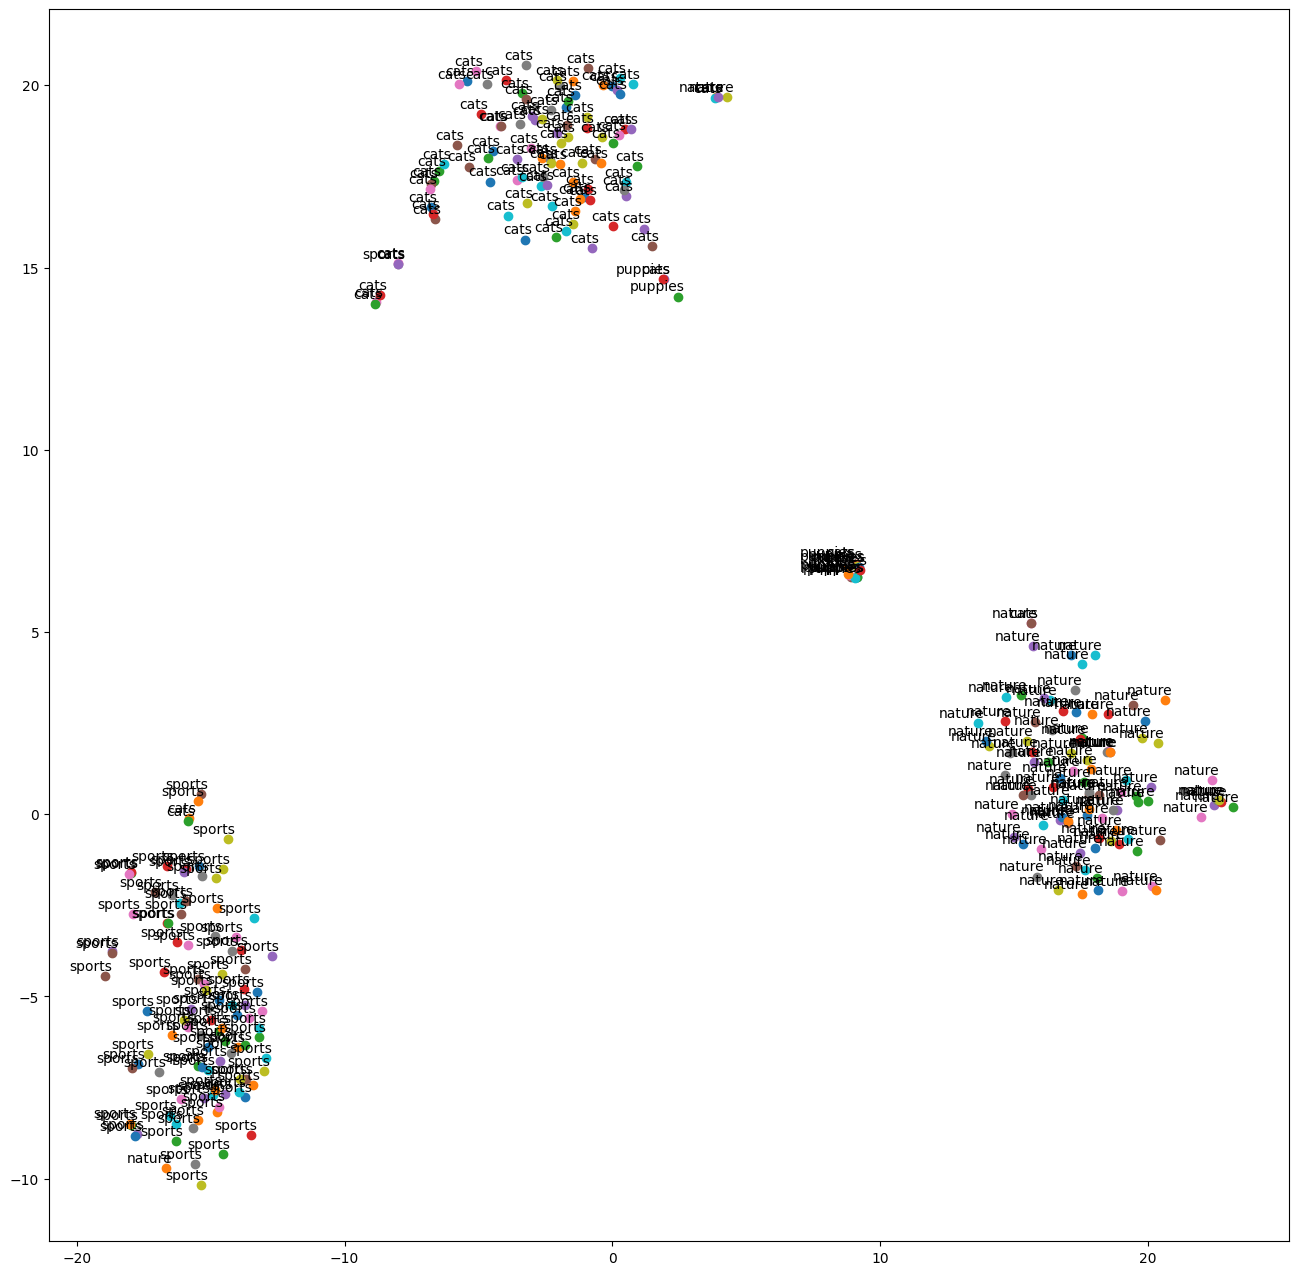

In [12]:
tsne_plot(vectors_for_query)

In [13]:
len(vectors_for_query['puppies'])

14

In [14]:
vectors_for_query['puppies'][0].shape

(768,)